# Unsupervised learning

## Clustering

## k-nn

In [16]:
import numpy as np
import random

 
def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def find_centers(X, K):
    # Initialize to K random centers
    oldmu=random.sample(list(np.arange(0,len(X))),k=K)
    oldmu=X[oldmu]
    mu=random.sample(list(np.arange(0,len(X))),k=K)
    mu=X[mu]
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

In [17]:
def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

In [18]:
X=init_board(N=100)

Text(0,0.5,'y')

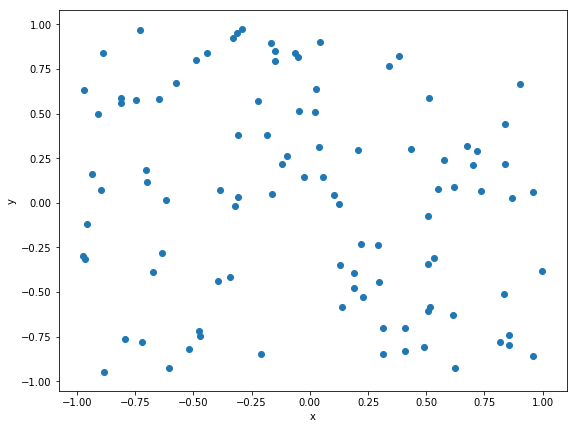

In [19]:
fig, ax = plt.subplots(figsize=(9.1,7))

x,y=np.transpose(X)
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [20]:
centroids,kclusters=find_centers(X, K=8)

Text(0,0.5,'y')

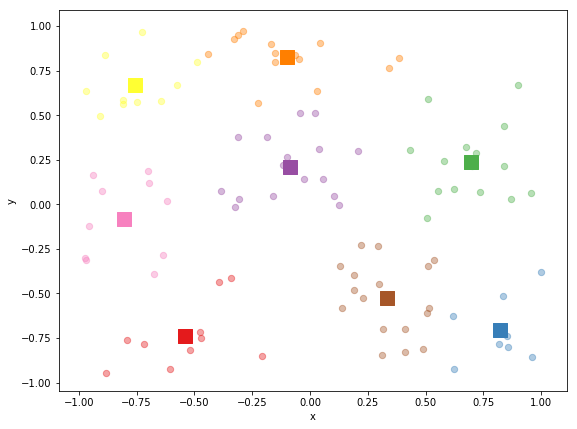

In [21]:
fig, ax = plt.subplots(figsize=(9.1,7))

colors=["#e41a1c",
"#377eb8",
"#4daf4a",
"#984ea3",
"#ff7f00",
"#ffff33",
"#a65628",
"#f781bf"]
for i in range(0,8):
    plt.scatter(*zip(centroids[i]),c=colors[i],s=200,marker='s')
    plt.scatter(*zip(*kclusters[i]),c=colors[i],s=40,alpha=0.4)

ax.set_xlabel("x")
ax.set_ylabel("y")

In [78]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
kclusters_scikit=kmeans.predict(X)

In [79]:
colors=["#e41a1c",
"#377eb8",
"#4daf4a",
"#984ea3",
"#ff7f00",
"#ffff33",
"#a65628",
"#f781bf"]

colorsdict=dict(np.transpose([list(set(kclusters_scikit)),colors]))

colorsdict

{'0': '#e41a1c',
 '1': '#377eb8',
 '2': '#4daf4a',
 '3': '#984ea3',
 '4': '#ff7f00',
 '5': '#ffff33',
 '6': '#a65628',
 '7': '#f781bf'}

In [80]:
kclusters_scikit=[colorsdict[str(item)] for item in kclusters_scikit]

Text(0,0.5,'y')

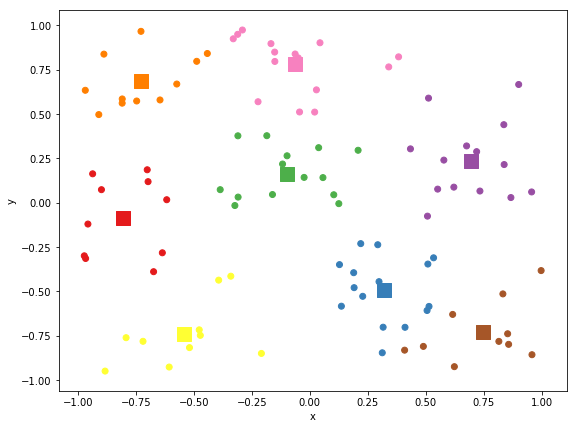

In [81]:
fig, ax = plt.subplots(figsize=(9.1,7))

colors=["#e41a1c",
"#377eb8",
"#4daf4a",
"#984ea3",
"#ff7f00",
"#ffff33",
"#a65628",
"#f781bf"]

for i in range(0,8):
    plt.scatter(*zip(kmeans.cluster_centers_[i]),c=colors[i],s=200,marker='s')
plt.scatter(X[:, 0], X[:, 1], c=kclusters_scikit)
ax.set_xlabel("x")
ax.set_ylabel("y")

# Supervised learning

## Classifiers

## K-Nearest Neighbors in Python

- Handle Data: Open the dataset from CSV and split into test/train datasets.
- Similarity: Calculate the distance between two data instances.
- Neighbors: Locate k most similar data instances.
- Response: Generate a response from a set of data instances.
- Accuracy: Summarize the accuracy of predictions.
- Main: Tie it all together.

Data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

### 1. Handle Data


In [86]:
import csv
with open('iris_data.txt') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print( ', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

In [91]:
import csv
import random
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
	with open(filename) as csvfile:
	    lines = csv.reader(csvfile)
	    dataset = list(lines)
	    for x in range(len(dataset)-1):
	        for y in range(4):
	            dataset[x][y] = float(dataset[x][y])
	        if random.random() < split:
	            trainingSet.append(dataset[x])
	        else:
	            testSet.append(dataset[x])

In [92]:
trainingSet=[]
testSet=[]
loadDataset('iris_data.txt', 0.66, trainingSet, testSet)
print( 'Train: ' + repr(len(trainingSet)))
print( 'Test: ' + repr(len(testSet)))

Train: 105
Test: 45


### 2. Similarity


In [130]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [131]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print( 'Distance: ' + repr(distance))

Distance: 3.4641016151377544


### 3. Neighbors


In [133]:
import operator 
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [134]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


### 4. Response

In [135]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [136]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

a


### 5. Accuracy


In [146]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [145]:
testSet = [[1,1,1,'a'], [2,2,2,'a'],[3,3,3,'b'], [3,3,3,'b']]
predictions = ['a', 'a','b', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

75.0


In [150]:
def main():
    # prepare data
    trainingSet=[]
    testSet=[]
    split = 0.67
    loadDataset('iris_data.txt', split, trainingSet, testSet)
    print( 'Train set: ' + repr(len(trainingSet)))
    print( 'Test set: ' + repr(len(testSet)))
    # generate predictions
    predictions=[]
    k = 2
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        #print('> predicted=' + str(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + str(accuracy) + '%')
main()

Train set: 90
Test set: 60
Accuracy: 96.66666666666667%


## Comparing classifiers using Scikit-Learn

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data preparation

In [160]:
# Swiss army knife function to organize the data

def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           # encode species strings
    classes = list(le.classes_)                    # save column names for submission
    test_ids = test.id                             # save test ids for submission
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)
train.head(1)

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.0,0.00293,0.00293,0.035156,0.0,0.0,0.004883,0.0,0.025391


In [161]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

### Sklearn Classifier Showdown

In [162]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.5755075129933762
SVC
****Results****
Accuracy: 81.8182%
Log Loss: 4.6286126881633525
NuSVC
****Results****
Accuracy: 88.3838%
Log Loss: 2.476537668720891
DecisionTreeClassifier
****Results****
Accuracy: 61.6162%
Log Loss: 13.257308111177938
RandomForestClassifier
****Results****
Accuracy: 87.8788%
Log Loss: 0.9412518233098258
AdaBoostClassifier
****Results****
Accuracy: 4.5455%
Log Loss: 4.207215776494152
GradientBoostingClassifier
****Results****
Accuracy: 58.0808%
Log Loss: 2.4627842511459246
GaussianNB
****Results****
Accuracy: 57.0707%
Log Loss: 14.827252492813216
LinearDiscriminantAnalysis
****Results****
Accuracy: 97.9798%
Log Loss: 0.9301977763139302
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 2.5253%
Log Loss: 33.66658507180697


/Users/lgaalves/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:510: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


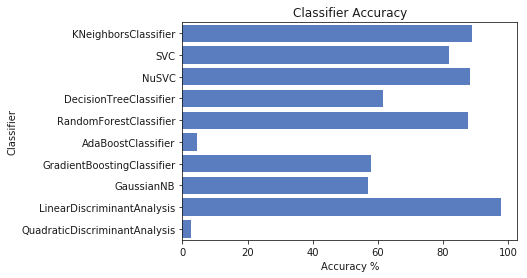

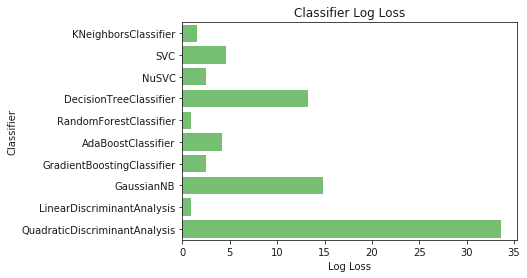

In [163]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Regressors

### Linear regression

In [151]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [152]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [153]:
# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [154]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [155]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


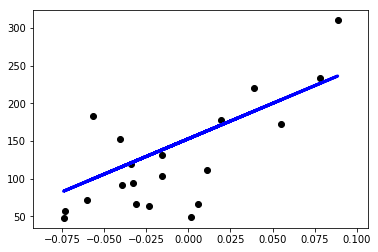

In [157]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.show()

### Regression with Random Forest  

In [172]:
from sklearn.ensemble import RandomForestRegressor

In [173]:
rf = RandomForestRegressor()

In [175]:
# Train the model using the training sets
rf.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = rf.predict(diabetes_X_test)

In [176]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 3751.12
Variance score: 0.22


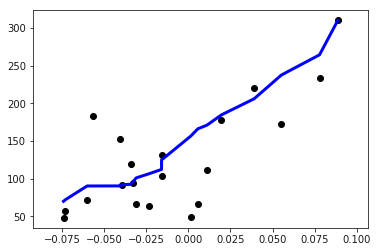

In [178]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(sorted(diabetes_X_test), sorted(diabetes_y_pred), color='blue', linewidth=3)
plt.show()